# Model Development - Laptop Pricing

#### Objectives

1. Use linear regression in one variable to fit the parameters to a model
2. Use linear regression in multiple variables to fit the parameters to a model
3. Use Polynomial regression in single variable to fit the parameters to a model
4. Create a pipeline performing linear regression using multiple features in polynomial scaling
5. Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

In this excersise let's develop several models that will predict the price of the laptop using the variables and featuers. This is just an estimate but should give us an objective of how much should the laptop cost.

Some questions we want to ask in this excersie are:
1. Do I know if the dealer is offering fair value for my trade-in?
2. Do I know if I put a fair value on my car?

In data analytics, we often use "MODEL DEVELOPMENT" to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the reults.

In [1]:
#importing libraries
import pandas as pd #for data manupulation
import numpy as np #for numerical anaylis
import matplotlib.pyplot as plt #for data visualization(low-level)
import seaborn as sns #for data visualization(high - level)
%matplotlib inline

In [2]:
laptop_pricing_data = 'cleandata_laptop_pricing_df.csv'

In [3]:
df = pd.read_csv(laptop_pricing_data)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,False,True
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,True,False
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,True,False
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,False,True
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,True,False


## 1. Linear Regression and Multiple Linear Regression

### Linear Regression

One example of a data model that we will be using is:

### Simple Linear Regression

Simple linear regression is a method to help us understand the relationship between two variables:

1. The predictor/independent variable (X)
2. The response/dependent variable (that we want to predict) (Y)

The result of a linear regression is a linear function, that predicts the response(dependent) variable as a function of the predictor(independent) variable.

#### Linear Function

                          "Y-hat = mX + c"

1. 'c' refers to the 'intercept' of the regression line, in other words - the value of Y when X is 0.
2. 'm' refers to the 'slope' of the regression line, in other words - the value with which Y changes when X increases by unit 1.

In [4]:
#let's load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [5]:
#creating linear regression model
lm = LinearRegression()
lm

LinearRegression()

From previous excersie, "EDA - Laptop Pricing" we learned that 'CPU_frequency' is the parameter with the lowest p_value among the different features of the dataset. Create a single feature linear regression model that fits the pair of "CPU_frequency' and 'price' to find the model for prediction.

In [6]:
X = df[['CPU_frequency']]
Y = df['Price']

In [7]:
lm.fit(X,Y) #.fit(X,Y) trains the model by finding the best-fit line using the least squares method (y=mx+c)

LinearRegression()

In [8]:
# we can output a prediction
Y_hat = lm.predict(X)
Y_hat[0:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

In [9]:
#value for intercept 'c'
lm.intercept_

253.66117068582116

In [10]:
#value for slope/coefficent
lm.coef_

array([1485.19362648])

#### What is the final estimated linear model we got?

As we see above, the linear regression model structure is "Y-hat = mX + c", piulling in the actual values we got:

      Price = 1485.1936 x CPU_frequency + 253.6611

Let's generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

C:\Users\ABID\AppData\Local\Temp\ipykernel_10752\3799258790.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
C:\Users\ABID\AppData\Local\Temp\ipykernel_10752\3799258790.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


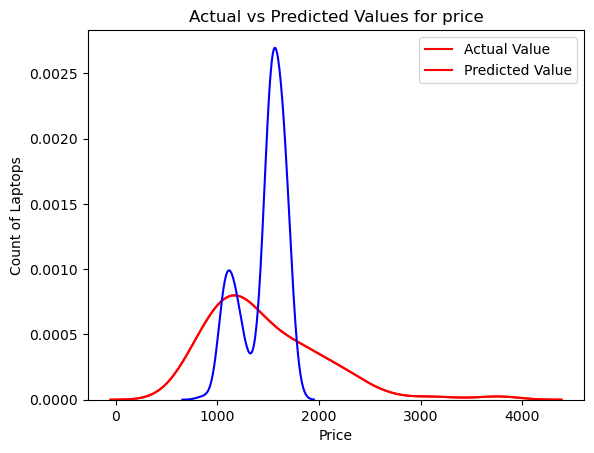

In [12]:
ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Y_hat, hist = False, color = 'b', label = 'Predicted Value')

plt.title('Actual vs Predicted Values for price')
plt.xlabel('Price')
plt.ylabel('Count of Laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Evaluating the Mean Squared Error and R^2 values for the model

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse_slr = mean_squared_error(df['Price'], Y_hat)
r2_score_slr = lm.score(X,Y)

print('The mean square error of price and predicted value is: ', mse_slr)
print('The R-square for linear regression is: ', r2_score_slr)

The mean square error of price and predicted value is:  284583.4405868629
The R-square for linear regression is:  0.1344436321024326


### Multiple Linear Regression

The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', RAM_GB', 'Storage_GB_SSD', 'CPU_CORE', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression systenm

In [23]:
z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
lm1 = LinearRegression ()
lm1.fit(z,Y)
Y_hat = lm1.predict(z)

In [24]:
lm1.intercept_

-841.9913259091106

In [25]:
lm1.coef_

array([ 9.61283977e+02,  8.68089292e+01,  3.94604825e-01,  6.56633979e+01,
       -4.27445318e+02,  9.78000871e+01,  1.91295466e+02])

### Note - Do refer "Model Development - Used car Pricing" excersie jupyter notebook for in detail explation of Multiple linear regrssion and all other models 

C:\Users\ABID\AppData\Local\Temp\ipykernel_10752\2608932710.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
C:\Users\ABID\AppData\Local\Temp\ipykernel_10752\2608932710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


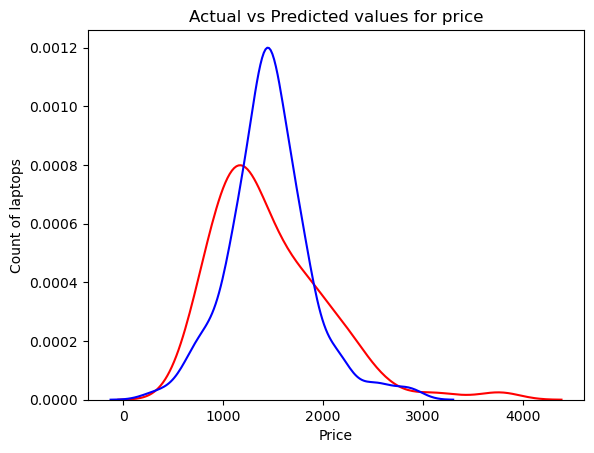

In [26]:
#distribution graph of predicted values as well as actual values
ax2 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Y_hat, hist = False, color = 'b', label = 'Fitted Value', ax = ax2)

plt.title('Actual vs Predicted values for price')
plt.xlabel('Price')
plt.ylabel('Count of laptops')
plt.show()

Let's find the R^2 and MSE value for the fit, and compare is ithis is better or worst than the performance of simple linear regression?

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse_mlr = mean_squared_error(df['Price'], Y_hat)
r2_score_mlr = lm1.score(z, df['Price'])

print('The mean square error of price and predicted value is: ', mse_mlr)
print('The R-square for linear regression is: ', r2_score_mlr)

The mean square error of price and predicted value is:  161680.57263893113
The R-square for linear regression is:  0.5082509055187372


### 3. Polynomial Regression

Use the variable "CPU+_frequency" to create polynomial features. Try this for 3 different values of polynomial degree (Polynomial fits are done using numpy.plotfit).

In [29]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X,Y,1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X,Y,3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X,Y,5)
p5 = np.poly1d(f5)

In [35]:
#plot the regression output against the actual data points to note how the data fits in each case
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title(f'polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')
    plt.show()

Call this function for the 3 models created and get the required graphs.

In [31]:
#Call for function of degree 1
PlotPolly(p1, X, Y, 'CPU_frequency')

In [32]:
PlotPolly(p3, X, Y, 'CPU_frequency') #Call for function of degree 3

In [33]:
PlotPolly(p5, X, Y, 'CPU_frequency') #Call for function of degree 5

In [36]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796530986
The MSE value for 3rd degree polynomial is:  241024.8630384881
The R-square value for 5th degree polynomial is:  0.3030822706444306
The MSE value for 5th degree polynomial is:  229137.29548052172


### 4 - Pipeline

Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline

In [40]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define independent variables (make sure df is correctly loaded)
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]

# Convert categorical variables if needed (use One-Hot Encoding or Label Encoding)
Z = Z.astype(float)  # Ensure all values are numeric

# Define the pipeline input
Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias=False)), 
         ('model', LinearRegression())]

# Create the pipeline
pipe = Pipeline(Input)

In [42]:
# Fit the pipeline model
pipe.fit(Z, Y)

# Predict using the pipeline
ypipe = pipe.predict(Z)

# Calculate and print the error metrics
from sklearn.metrics import mean_squared_error, r2_score

print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))


MSE for multi-variable polynomial pipeline is:  120595.8612802837
R^2 for multi-variable polynomial pipeline is:  0.6332094535859659


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.